**911 Calls Capstone Project - Analyzing Emergency Call Data**

In this capstone project, I will be analyzing 911 call data provided by Kaggle. The data contains valuable information such as the time of the call, the location, and the nature of the emergency. By diving into this dataset, I aim to uncover insights about common reasons for emergency calls, time-based patterns, and other trends.

In [3]:
 # Data overview and setup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Load dataset
df = pd.read_csv("911.csv")


In [4]:
df.info()  # Overview of the data structure
df.head(3)  # View the first few rows


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1


In [5]:
df['zip'].value_counts().head(5) # Top 5 zip codes for 911 calls


zip
19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: count, dtype: int64

In [6]:
df['twp'].value_counts().head(5) # Top 5 townships (twp) for 911 calls


twp
LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: count, dtype: int64

In [7]:
df['title'].nunique() # unique titles


110

Extracting the "Reason" for 911 calls I noticed that the "title" column contains information about the department responding to the emergency (EMS, Fire, Traffic) along with a description. I will create a new column called "Reason" to isolate the department.

In [8]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])


In [9]:
df['Reason'].value_counts() # Most common reason for 911 calls


Reason
EMS        48877
Traffic    35695
Fire       14920
Name: count, dtype: int64

<Axes: xlabel='Reason', ylabel='count'>

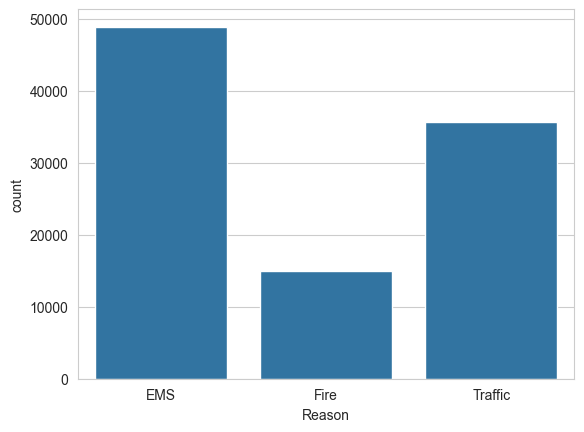

In [10]:
sns.countplot(x='Reason', data=df)  # Visualizing the count of 911 calls by Reason


Analyzing time information

In [11]:
df['timeStamp'] = pd.to_datetime(df['timeStamp']) # Converting 'timeStamp' to DateTime objects


In [12]:
# Creating new time-based columns: Hour, Month, and Day of Week

df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

# Mapping Day of Week from numbers to string names
dmap = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
df['Day of Week'] = df['Day of Week'].map(dmap)


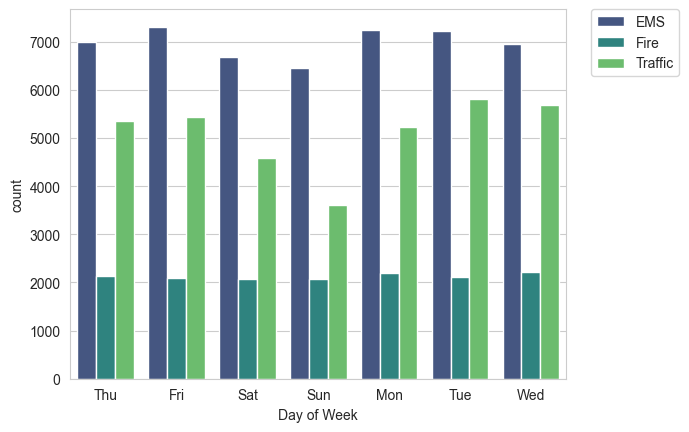

In [13]:
# Countplot for Day of Week with Reason as hue

sns.countplot(x='Day of Week', data=df, hue='Reason', palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


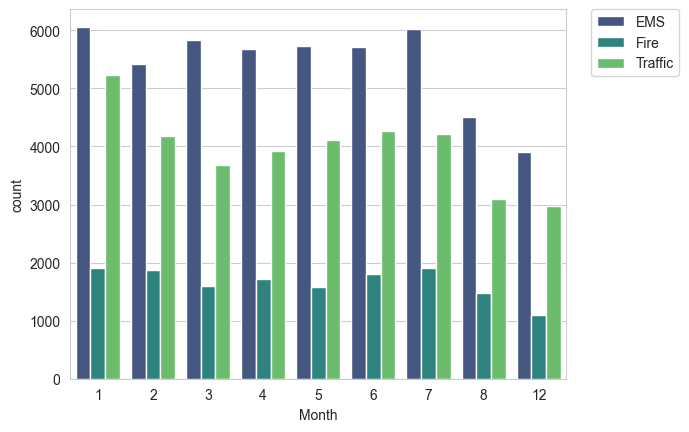

In [14]:
# Countplot for Month with Reason as hue

sns.countplot(x='Month', data=df, hue='Reason', palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


## Grouping Data by Month

In [15]:
# Creating a DataFrame grouped by Month
byMonth = df.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


<Axes: xlabel='Month'>

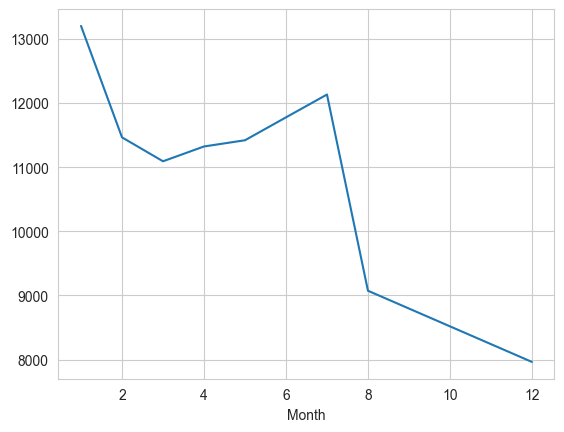

In [16]:
# simple plot for the number of 911 calls per month
byMonth['twp'].plot()


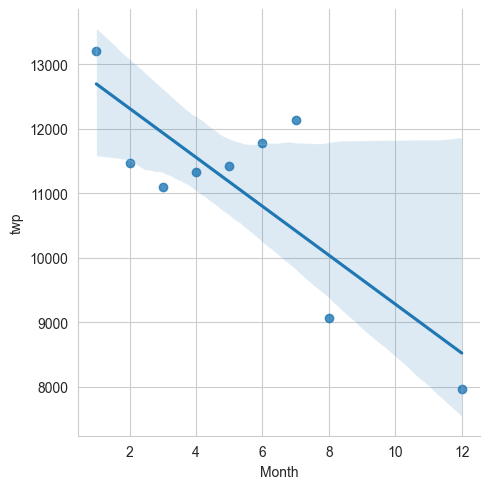

In [17]:
 # Using Seaborn's lmplot to add a linear fit for calls per month

sns.lmplot(x='Month', y='twp', data=byMonth.reset_index())


## Daily 911 Call Trends


In [18]:
# Creating a 'Date' column to analyze daily call counts
df['Date'] = df['timeStamp'].apply(lambda t: t.date())


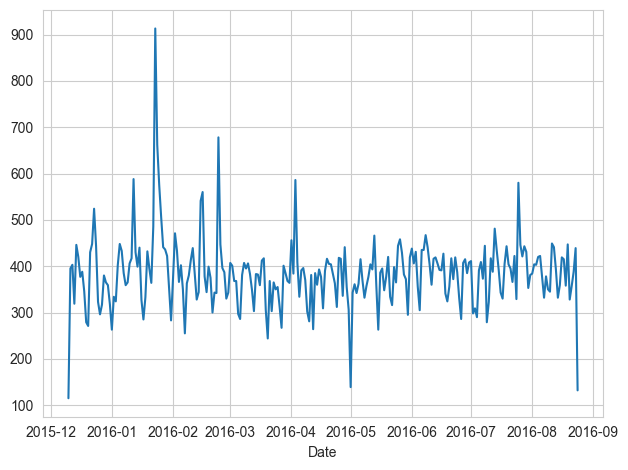

In [19]:
# Plotting the number of 911 calls per day

df.groupby('Date').count()['twp'].plot()
plt.tight_layout()


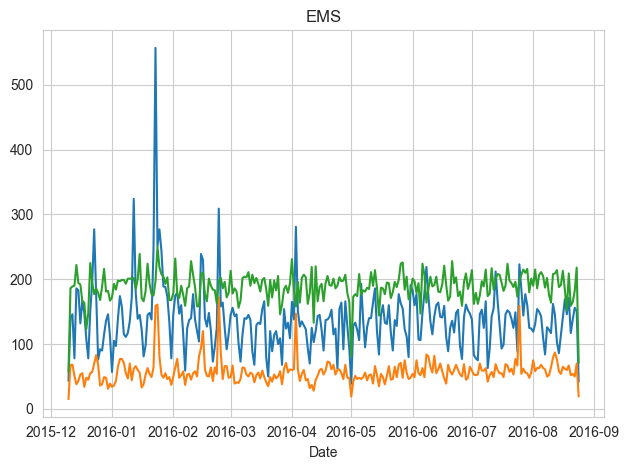

In [20]:
# Creating separate daily call plots for each Reason (Traffic, Fire, EMS)

df[df['Reason'] == 'Traffic'].groupby('Date').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()

df[df['Reason'] == 'Fire'].groupby('Date').count()['twp'].plot()
plt.title('Fire')
plt.tight_layout()

df[df['Reason'] == 'EMS'].groupby('Date').count()['twp'].plot()
plt.title('EMS')
plt.tight_layout()


## Heatmaps and Clustermaps

In [21]:
# estructuring the DataFrame to analyze calls by Day of Week and Hour
dayHour = df.groupby(by=['Day of Week', 'Hour']).count()['Reason'].unstack()


<Axes: xlabel='Hour', ylabel='Day of Week'>

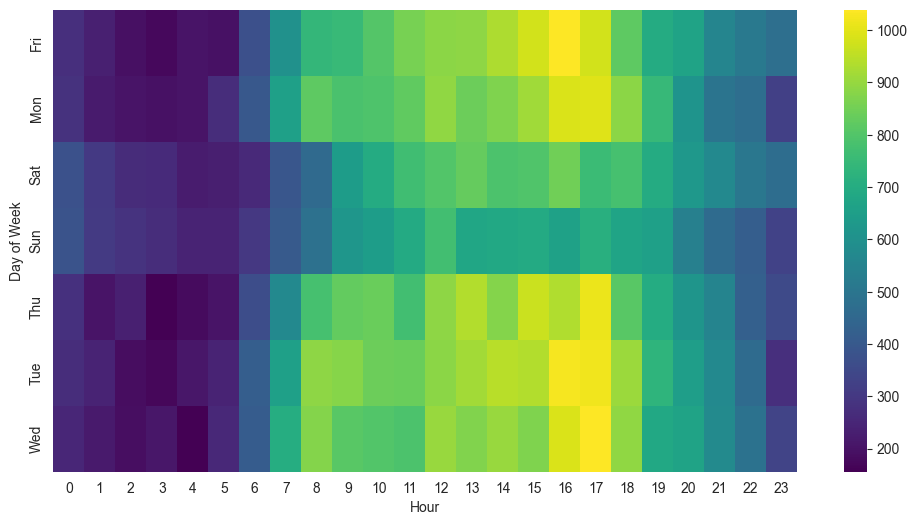

In [22]:
# Creating a heatmap for calls by Day of Week and Hour

plt.figure(figsize=(12,6))
sns.heatmap(dayHour, cmap='viridis')


## Conclusion ##
This project has provided valuable insights into the patterns of 911 calls in terms of time, location, and type of emergency. Through the visualizations and analyses, I've identified trends that could potentially help in resource allocation and emergency response planning. Further exploration could involve predictive modeling to anticipate peak emergency call times or analyzing call data across multiple years.